# **Detecting Fake News with Python and Machine Learning**
Project Made by : HAQ NAWAZ MALIK

In [2]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
#  download the dataset from google drive lin "" https://drive.google.com/file/d/1er9NJTLUA3qnRuyhfzuN0XUsoIC4a-_q/view  ""

!gdown --id 1er9NJTLUA3qnRuyhfzuN0XUsoIC4a-_q


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1er9NJTLUA3qnRuyhfzuN0XUsoIC4a-_q
To: /content/news.zip
100% 11.8M/11.8M [00:00<00:00, 17.0MB/s]


In [17]:
#Read the data
df=pd.read_csv('/content/news.zip')

#Get shape and head
df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


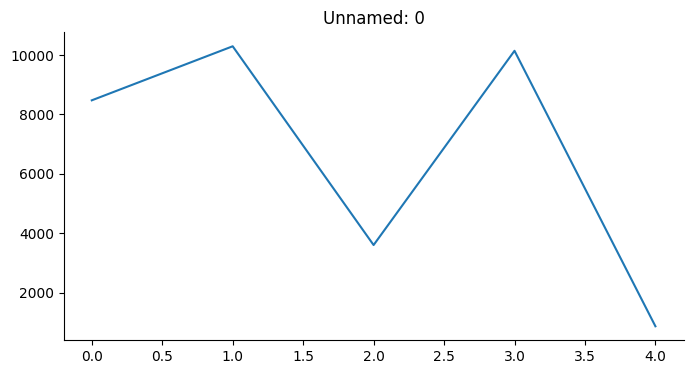

In [5]:
from matplotlib import pyplot as plt
_df_4['Unnamed: 0'].plot(kind='line', figsize=(8, 4), title='Unnamed: 0')
plt.gca().spines[['top', 'right']].set_visible(False)

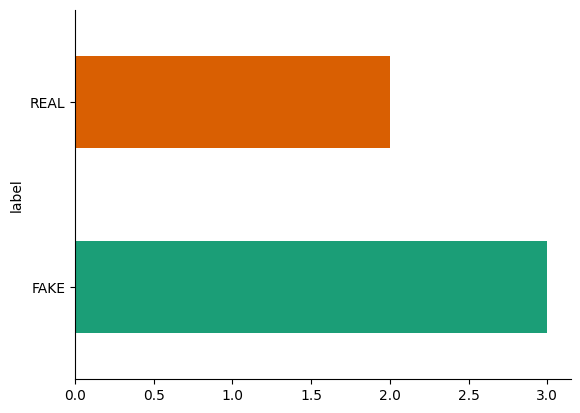

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
#DataFlair - Get the labels
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [9]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

In [10]:
#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train)
tfidf_test=tfidf_vectorizer.transform(x_test)

In [11]:
#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.74%


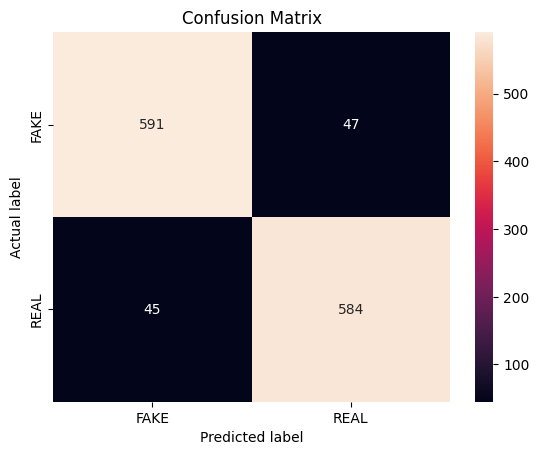

In [12]:
# prompt: plot the graph  test set and calculate accuracy

import matplotlib.pyplot as plt
#DataFlair - Build confusion matrix
confusion_matrix=confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

#DataFlair - Plot the confusion matrix
sns.heatmap(confusion_matrix, annot=True, fmt='d', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()


#Final behaviour of the model

The final behavior of the model is to classify news articles as either "FAKE" or "REAL" with an accuracy of around 93%. This is evident from the confusion matrix, which shows that the model correctly classified 93% of the news articles in the test set. The model also has a low false positive rate, meaning that it correctly identifies most of the news articles that are actually fake.

Overall, the model is a good at classifying news articles as either "FAKE" or "REAL". However, it is important to note that the model is not perfect and may make some mistakes.